In [2]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import pandas as pd
from db_utils import Query, QueryAll

data = QueryAll()
cols = ["id", "title", "globalId", "categoryId", "categoryName", "url", "location", "shippingType", "shippingLocations",
                "shippingTime", "startTime", "endTime", "returnsAccepted", "conditionId", "listingIsTopRated", 
                "sellerFeedbackScore", "sellerPositivePercent", "sellerName", "sellerIsTopRated", "price", "currency", "bids"]

In [3]:
df = pd.DataFrame(data, columns=cols)
names = ['sellerFeedbackScore', 'conditionId', 'sellerPositivePercent', 'categoryId', 'shippingTime', 'returnsAccepted', 'sellerIsTopRated']
new_df = df[names].copy()

In [4]:
new_df

,sellerFeedbackScore,conditionId,sellerPositivePercent,categoryId,shippingTime,returnsAccepted,sellerIsTopRated
0,52,3000,100.0,31388,0,0,0
1,929,3000,99.7,31388,3,0,1
2,736,3000,100.0,31388,3,0,0
3,1028,3000,100.0,31388,2,0,1
4,268,1000,96.6,48638,0,0,0
...,...,...,...,...,...,...,...
10968,4184,3000,99.4,48515,2,1,0
10969,25381,-1,100.0,11718,3,0,1
10970,508,3000,97.9,185053,3,0,1
10971,39175,1500,97.4,171485,1,0,1


In [5]:
y = df.price

In [6]:
x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size=0.2)


In [7]:
gradient_regressor = GradientBoostingRegressor(max_depth = 2,n_estimators=3, learning_rate=1.0)

In [8]:
model = gradient_regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [9]:
r2_score(y_pred, y_test)

-39.85138651321402

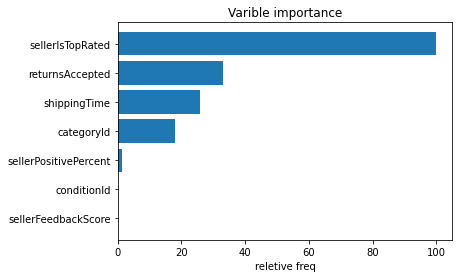

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importance = model.feature_importances_

##Making importance reletive to max importance
feature_importance = 100.0*(feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, names)
plt.xlabel("reletive freq")
plt.title("Varible importance")
plt.show()



from sklearn .model_selection import GridSearchCV
LR = {'lea

In [11]:
from sklearn .model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10, 0.05], 'n_estimators':[100, 150,200,250]}

tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=LR, scoring='r2')
tuning.fit(x_train, y_train)
tuning.best_params_
tuning.best_score_

0.03176191693754558

In [12]:
print(mean_squared_error(y_test, y_pred))
print("Yes")

250451.2847392721
Yes


In [13]:
print("a")

a
